In [1]:
# Start a jupyter notebook from an envoironment with asetup already run
# if jupyter is not installed, use:
# > pip install jupyter --user
# > ~/.local/bin/jupyter-notebook --port=8889 --NotebookApp.port_retries=0 --no-browser --NotebookApp.token='atlas'&


# import uproot
import numpy as np
import ROOT
import itertools
from array import array
ROOT.gROOT.SetStyle('ATLAS')
import time
import os
from IPython.display import Image, display

def draw_note(x, y, text='Internal', size=30, font=63):
    l = ROOT.TLatex()
    l.SetNDC()
    l.SetTextColor(1)
    l.SetTextFont(font)
    l.SetTextSize(size);
    l.DrawLatex(x, y, text)

def atlas_label(x, y, text=None, color=1):
    draw_note(x, y, r"#bf{#it{ATLAS}} " + text)

FONT_SIZE = 30

Welcome to JupyROOT 6.20/06


In [2]:
if(not ROOT.xAOD.Init().isSuccess()): print("Failed xAOD.Init()")

xAOD::Init                INFO    Environment initialised for data access


In [3]:
f = ROOT.TFile(f'/data/newhouse/LRT/batch/testing/testing_22_v8_LRT_off/TTBAR/AOD.root')
t = ROOT.xAOD.MakeTransientTree( f, "CollectionTree")
t.GetEntries()

9900

xAOD::TEvent::readFrom    INFO    Was expecting a metadata tree with size 1, instead of 100.
xAOD::TEvent::readFrom    INFO    File most probably produced by hadd...
xAOD::TEvent::proxy_exact WARNING Can't find BranchInfo for 946497385.
xAOD::TEvent::addToStore  WARNING Function should only be called through an invalid ElementLink
xAOD::TEvent::proxy_exact WARNING Can't find BranchInfo for 466416009.
xAOD::TEvent::proxy_exact WARNING Can't find BranchInfo for 573025474.
xAOD::TEvent::proxy_exact WARNING Can't find BranchInfo for 886873592.
xAOD::TEvent::proxy_exact WARNING Can't find BranchInfo for 161329519.
xAOD::TEvent::proxy_exact WARNING Can't find BranchInfo for 725407868.
xAOD::TEvent::proxy_exact WARNING Can't find BranchInfo for 965623431.
xAOD::TEvent::proxy_exact WARNING Can't find BranchInfo for 484114478.
xAOD::TEvent::proxy_exact WARNING Can't find BranchInfo for 106374743.
xAOD::TEvent::proxy_exact WARNING Can't find BranchInfo for 612539593.
xAOD::TEvent::proxy_exact WA

In [4]:
# Get histogram by Draw method
h_InDetTrackParticles_d0 = ROOT.TH1F("h_InDetTrackParticles_d0","h_InDetTrackParticles_d0",100,-350,350); 
t.Draw("InDetTrackParticles.d0()>>h_InDetTrackParticles_d0","", "")
# h_InDetTrackParticles_d0 = ROOT.gDirectory.Get("h_InDetTrackParticles_d0");

# Get histogram by Draw method
h_InDetForwardTrackParticles_d0 = ROOT.TH1F("h_InDetForwardTrackParticles_d0","h_InDetForwardTrackParticles_d0",100,-350,350); 
t.Draw("InDetForwardTrackParticles.d0()>>h_InDetForwardTrackParticles_d0","", "")
# h_InDetForwardTrackParticles_d0 = ROOT.gDirectory.Get("h_InDetForwardTrackParticles_d0");


165

TCanvas::MakeDefCanvas    INFO     created default TCanvas with name c1


In [1]:
c = ROOT.TCanvas("c", "", int(1200), int(800))
c.SetLogy()

histograms = [h_InDetTrackParticles_d0, h_InDetForwardTrackParticles_d0]

for h in histograms:
    h.SetLineWidth(3)
    h.Sumw2()
    
h_InDetTrackParticles_d0.GetYaxis().SetRangeUser(1,10e6);
h_InDetTrackParticles_d0.SetLineColor(8)
h_InDetTrackParticles_d0.SetMarkerColor(8)
h_InDetTrackParticles_d0.Draw("same hist e1")

h_InDetForwardTrackParticles_d0.SetLineColor(ROOT.kRed)
h_InDetForwardTrackParticles_d0.SetMarkerColor(ROOT.kRed)
h_InDetForwardTrackParticles_d0.Draw("same hist e1")


x, y = (0.6, 0.8)
leg = ROOT.TLegend(x, 0.8, 0.91, 0.91)
leg.SetTextSize(0.025)
leg.SetBorderSize(0)
leg.SetFillColor(ROOT.kWhite)
leg.SetShadowColor(ROOT.kWhite)
for h, label in zip(histograms, ["InDetTrackParticles", "InDetForwardTrackParticles"]) :
    leg.AddEntry(h, label +": "+ str(int(h.GetEntries())), "lp")
leg.Draw()

dy = .07
draw_note(x, y-dy, f'LRT is NOT run')
atlas_label(x,y-2*dy,'Internal')

c.Draw()


NameError: name 'ROOT' is not defined

In [6]:
f = ROOT.TFile(f'/data/newhouse/LRT/batch/testing/testing_22_v8_LRT_on/TTBAR/AOD.root')
t = ROOT.xAOD.MakeTransientTree( f, "CollectionTree")
t.GetEntries()

9900

xAOD::TEvent::readFrom    INFO    Was expecting a metadata tree with size 1, instead of 100.
xAOD::TEvent::readFrom    INFO    File most probably produced by hadd...
xAOD::MakeTransientTree   INFO    Created transient tree "CollectionTree" in ROOT's common memory


In [7]:
# Get histogram by Draw method
h_InDetTrackParticles_d0 = ROOT.TH1F("h_InDetTrackParticles_d0","h_InDetTrackParticles_d0",100,-350,350); 
t.Draw("InDetTrackParticles.d0()>>h_InDetTrackParticles_d0","", "")
# h_InDetTrackParticles_d0 = ROOT.gDirectory.Get("h_InDetTrackParticles_d0");

# Get histogram by Draw method
h_InDetForwardTrackParticles_d0 = ROOT.TH1F("h_InDetForwardTrackParticles_d0","h_InDetForwardTrackParticles_d0",100,-350,350); 
t.Draw("InDetForwardTrackParticles.d0()>>h_InDetForwardTrackParticles_d0","", "")
# h_InDetForwardTrackParticles_d0 = ROOT.gDirectory.Get("h_InDetForwardTrackParticles_d0");


158

TCanvas::Constructor      WARNING Deleting canvas with same name: c


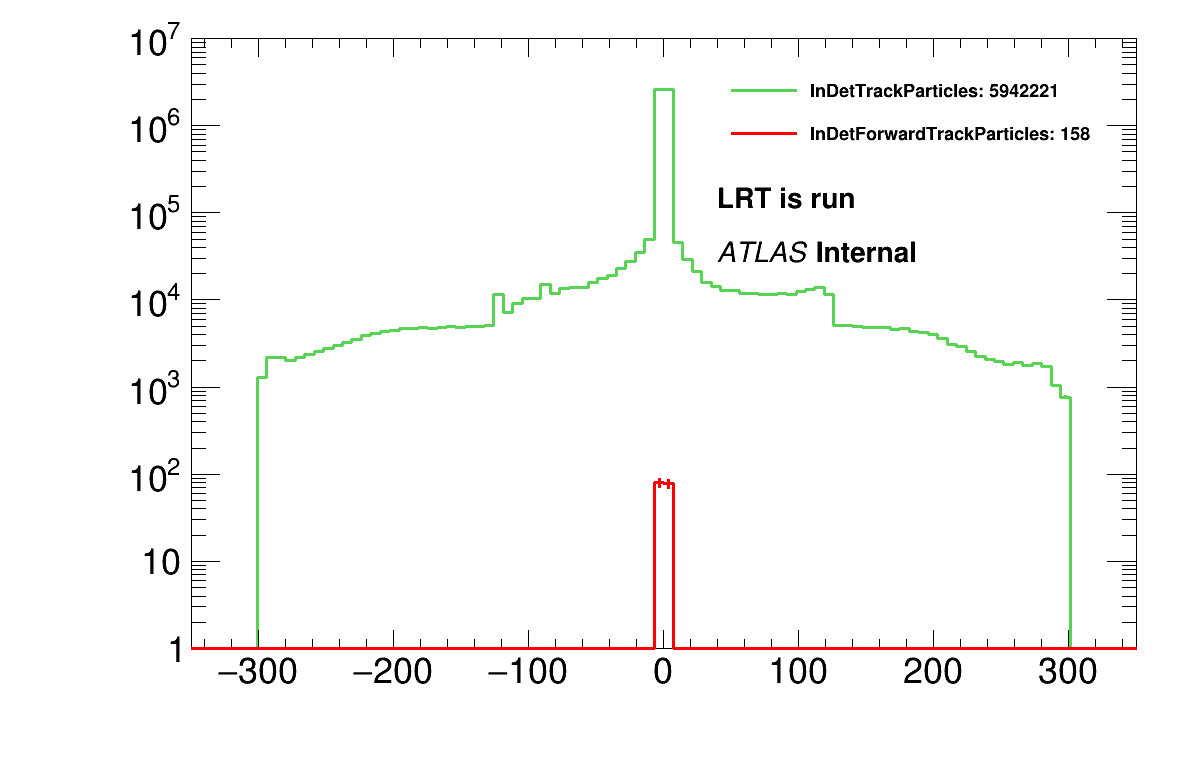

In [8]:
c = ROOT.TCanvas("c", "", int(1200), int(800))
c.SetLogy()

histograms = [h_InDetTrackParticles_d0, h_InDetForwardTrackParticles_d0]

for h in histograms:
    h.SetLineWidth(3)
    h.SetMarkerSize(0)
    h.Sumw2()
    
h_InDetTrackParticles_d0.GetYaxis().SetRangeUser(1,10e6);
h_InDetTrackParticles_d0.SetLineColor(8)
h_InDetTrackParticles_d0.SetMarkerColor(8)
h_InDetTrackParticles_d0.Draw("same hist e1")

h_InDetForwardTrackParticles_d0.SetLineColor(ROOT.kRed)
h_InDetForwardTrackParticles_d0.SetMarkerColor(ROOT.kRed)
h_InDetForwardTrackParticles_d0.Draw("same hist e1")


x, y = (0.6, 0.8)
leg = ROOT.TLegend(x, 0.8, 0.91, 0.91)
leg.SetTextSize(0.025)
leg.SetBorderSize(0)
leg.SetFillColor(ROOT.kWhite)
leg.SetShadowColor(ROOT.kWhite)
for h, label in zip(histograms, ["InDetTrackParticles", "InDetForwardTrackParticles"]) :
    leg.AddEntry(h, label +": "+ str(int(h.GetEntries())), "lp")
leg.Draw()

dy = .07
draw_note(x, y-dy, f'LRT is run')
atlas_label(x,y-2*dy,'Internal')

c.Draw()


In [9]:
f = ROOT.TFile(f'/data/newhouse/LRT/batch/testing/testing_22_v8_LRT_separate/TTBAR/AOD.root')
t = ROOT.xAOD.MakeTransientTree( f, "CollectionTree")
t.GetEntries()

9900

xAOD::TEvent::readFrom    INFO    Was expecting a metadata tree with size 1, instead of 100.
xAOD::TEvent::readFrom    INFO    File most probably produced by hadd...
xAOD::MakeTransientTree   INFO    Created transient tree "CollectionTree" in ROOT's common memory


In [10]:
# Get histogram by Draw method
h_InDetTrackParticles_d0 = ROOT.TH1F("h_InDetTrackParticles_d0","h_InDetTrackParticles_d0",100,-350,350); 
t.Draw("InDetTrackParticles.d0()>>h_InDetTrackParticles_d0","", "")
# h_InDetTrackParticles_d0 = ROOT.gDirectory.Get("h_InDetTrackParticles_d0");

# Get histogram by Draw method
h_InDetForwardTrackParticles_d0 = ROOT.TH1F("h_InDetForwardTrackParticles_d0","h_InDetForwardTrackParticles_d0",100,-350,350); 
t.Draw("InDetForwardTrackParticles.d0()>>h_InDetForwardTrackParticles_d0","", "")
# h_InDetForwardTrackParticles_d0 = ROOT.gDirectory.Get("h_InDetForwardTrackParticles_d0");

# Get histogram by Draw method
h_InDetLargeD0TrackParticles_d0 = ROOT.TH1F("h_InDetLargeD0TrackParticles_d0","h_InDetLargeD0TrackParticles_d0",100,-300,300); 
t.Draw("InDetLargeD0TrackParticles.d0()>>h_InDetLargeD0TrackParticles_d0","", "")
# h_InDetForwardTrackParticles_d0 = ROOT.gDirectory.Get("h_InDetForwardTrackParticles_d0");

812081

In [11]:
# Get histogram by Draw method
h_InDetLargeD0TrackParticles_d0 = ROOT.TH1F("h_InDetLargeD0TrackParticles_d0","h_InDetLargeD0TrackParticles_d0",100,-300,300); 
t.Draw("InDetLargeD0TrackParticles.d0()>>h_InDetLargeD0TrackParticles_d0","", "")
# h_InDetForwardTrackParticles_d0 = ROOT.gDirectory.Get("h_InDetForwardTrackParticles_d0");

812081

TFile::Append             WARNING Replacing existing TH1: h_InDetLargeD0TrackParticles_d0 (Potential memory leak).


TCanvas::Constructor      WARNING Deleting canvas with same name: c


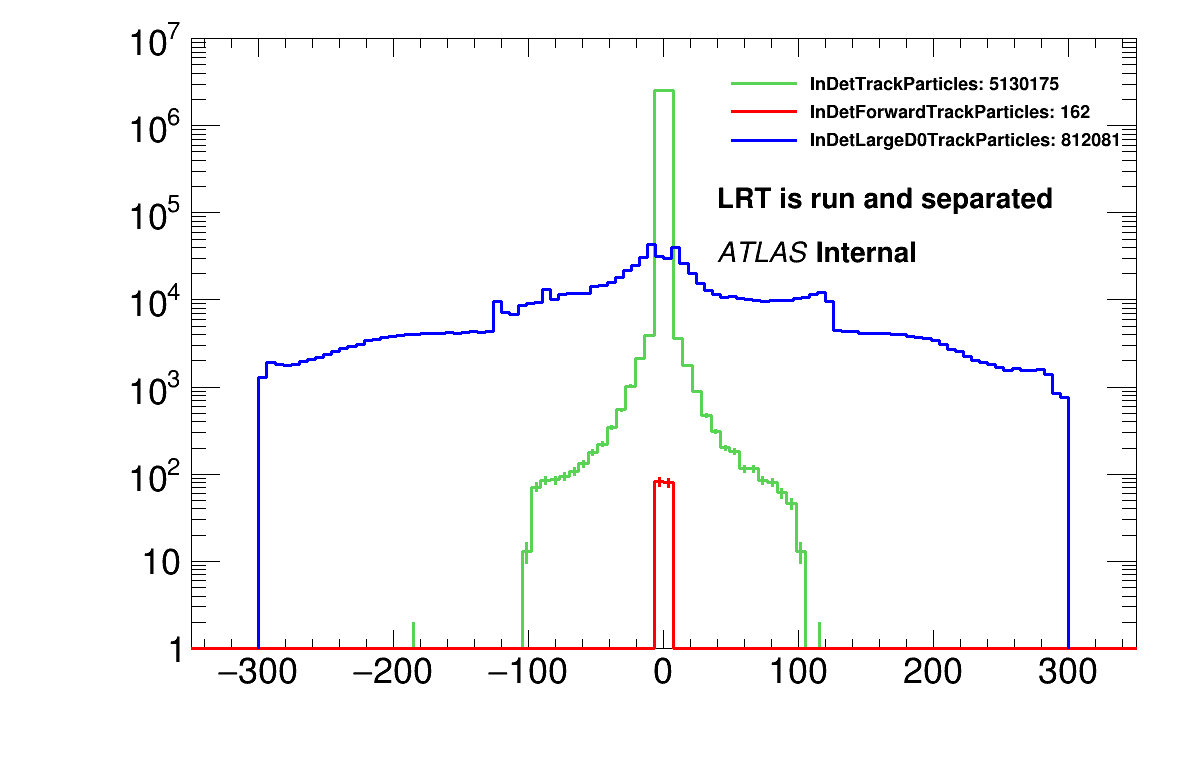

In [12]:
c = ROOT.TCanvas("c", "", int(1200), int(800))
c.SetLogy()

histograms = [h_InDetTrackParticles_d0, h_InDetForwardTrackParticles_d0, h_InDetLargeD0TrackParticles_d0]

for h in histograms:
    h.SetLineWidth(3)
    h.SetMarkerSize(0)
    h.Sumw2()
    
h_InDetTrackParticles_d0.GetYaxis().SetRangeUser(1,10e6);
h_InDetTrackParticles_d0.SetLineColor(8)
h_InDetTrackParticles_d0.SetMarkerColor(8)
h_InDetTrackParticles_d0.Draw("same hist e1")

h_InDetForwardTrackParticles_d0.SetLineColor(ROOT.kRed)
h_InDetForwardTrackParticles_d0.SetMarkerColor(ROOT.kRed)
h_InDetForwardTrackParticles_d0.Draw("same hist e1")

h_InDetLargeD0TrackParticles_d0.SetLineColor(ROOT.kBlue)
h_InDetLargeD0TrackParticles_d0.SetMarkerColor(ROOT.kBlue)
h_InDetLargeD0TrackParticles_d0.Draw("same hist e1")

x, y = (0.6, 0.8)
leg = ROOT.TLegend(x, 0.8, 0.91, 0.91)
leg.SetTextSize(0.025)
leg.SetBorderSize(0)
leg.SetFillColor(ROOT.kWhite)
leg.SetShadowColor(ROOT.kWhite)
for h, label in zip(histograms, ["InDetTrackParticles", "InDetForwardTrackParticles", "InDetLargeD0TrackParticles"]) :
    leg.AddEntry(h, label +": "+ str(int(h.GetEntries())), "lp")
leg.Draw()

dy = .07
draw_note(x, y-dy, f'LRT is run and separated')
atlas_label(x,y-2*dy,'Internal')

c.Draw()


In [13]:
InDetTrackParticles_LRT_separate = 5130175
InDetForwardTrackParticles_LRT_separate = 162
InDetLargeD0TrackParticles_LRT_separate = 812081
print('LRT separate total:', InDetTrackParticles_LRT_separate + InDetForwardTrackParticles_LRT_separate + InDetLargeD0TrackParticles_LRT_separate)

InDetTrackParticles_LRT_off = 5130175
InDetForwardTrackParticles_LRT_off = 165
print('LRT off total:', InDetTrackParticles_LRT_off + InDetForwardTrackParticles_LRT_off)

InDetTrackParticles_LRT_on = 5942221
InDetForwardTrackParticles_LRT_on = 158
print('LRT on total:', InDetTrackParticles_LRT_on + InDetForwardTrackParticles_LRT_on)

print()
print(InDetTrackParticles_LRT_separate + InDetLargeD0TrackParticles_LRT_separate)
print(InDetTrackParticles_LRT_on)
print("difference:", (InDetTrackParticles_LRT_separate + InDetLargeD0TrackParticles_LRT_separate) -  InDetTrackParticles_LRT_on)
print('these should be the same')
print()
print(InDetForwardTrackParticles_LRT_separate)
print(InDetForwardTrackParticles_LRT_on)
print("difference:", InDetForwardTrackParticles_LRT_separate - InDetForwardTrackParticles_LRT_on)
print('these should be the same')


LRT separate total: 5942418
LRT off total: 5130340
LRT on total: 5942379

5942256
5942221
difference: 35
these should be the same

162
158
difference: 4
these should be the same
